In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np

2023-07-10 21:39:07.495650: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 21:39:08.220700: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-10 21:39:08.220795: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-10 21:39:10.404212: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Inspecting Data

In [2]:
df = pd.read_csv('Data/train_1.csv')

In [54]:
df.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145062,Francisco_el_matemático_(serie_de_televisión_d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df['Page'].str.split('_')[73823]

['John', 'Lennon', 'en.wikipedia.org', 'mobile-web', 'all-agents']

In [4]:
df.shape

(145063, 551)

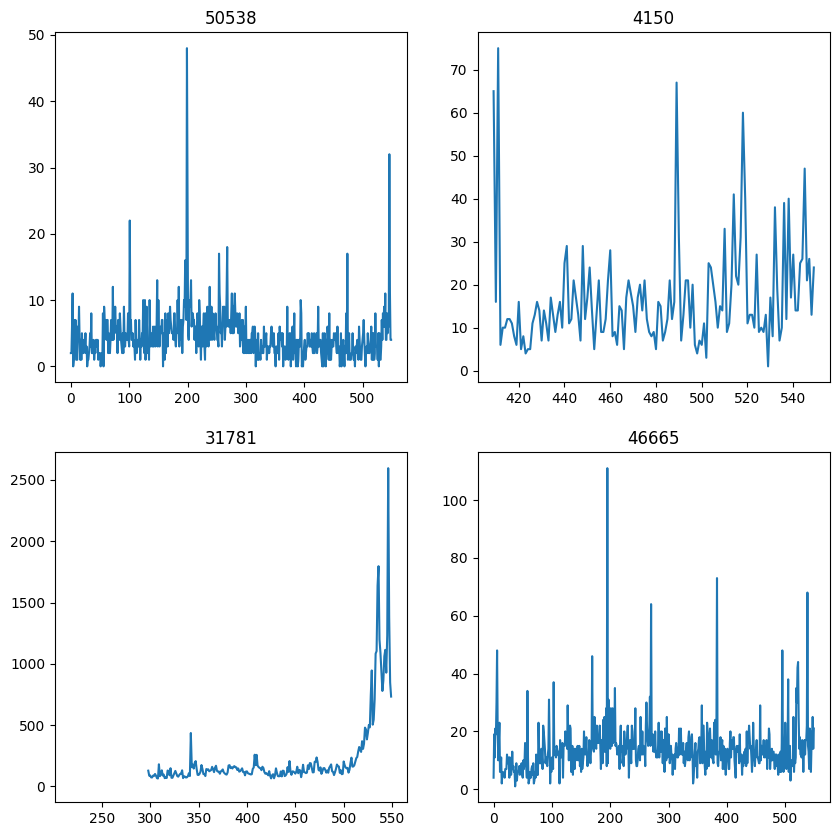

In [52]:
_, ax = plt.subplots(2, 2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        sample = random.randint(0, df.shape[0]-1)
        ax[i, j].plot(df.iloc[sample,1:].to_numpy())
        ax[i, j].set_title(sample)

The data for some websites is missing as shown. The websites themselves appear to be independent of one another.

In [53]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


# Regression with windows

In [202]:
def get_regression_model(window_size):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1, window_size)),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Dense(units=64, activation='tanh', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=128, activation='tanh', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=1, activation='linear', kernel_initializer='he_normal')
    ], name='RegressionModel')
    return model

def prepare_data(data: np.ndarray, window_size: int, split=(0.8, 0.1, 0.1)):
    assert sum(split) == 1, 'Total Split must cover 100% of input data'
    samples = []
    labels = []
    for i in range(data.shape[0] - window_size):
        samples.append(data[i:i+window_size])
        labels.append(data[i+window_size])
        
    samples = np.array(samples).astype('float32')
    labels = np.array(labels).astype('float32')
    
    permutations = np.random.permutation(range(samples.shape[0]))
    samples = samples[permutations]
    labels = labels[permutations]
    
    num_train = int(split[0] * samples.shape[0])
    num_cv = int(split[1] * samples.shape[0])
    num_test = int(split[2] * samples.shape[0])
    
    train_set = samples[:num_train].reshape((num_train, 1, window_size))
    train_labels = labels[:num_train].reshape((num_train,))
    cv_set = samples[num_train:num_train+num_cv].reshape((num_cv, 1, window_size))
    cv_labels = labels[num_train:num_train+num_cv].reshape((num_cv,))
    test_set = samples[num_train+num_cv:].reshape((samples.shape[0] - num_train - num_cv, 1, window_size))
    test_labels = labels[num_train+num_cv:].reshape((samples.shape[0] - num_train - num_cv,))
    
    return train_set, train_labels, cv_set, cv_labels, test_set, test_labels

normalize = lambda x: (x - x.mean()) / x.std()

In [196]:
train_data_pred = []
train_data_actual = []

cv_data_pred = []
cv_data_actual = []
for window in range(34, 35):
    train_set, train_labels, cv_set, cv_labels, test_set, test_labels = prepare_data(df.iloc[7,1:].to_numpy(), window)
    model = get_regression_model(window)
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005), metrics='accuracy')
    model.fit(normalize(train_set), normalize(train_labels), epochs=100, batch_size=32, validation_data=[cv_set, cv_labels])
    train_data_pred.append(model.predict(train_set).reshape((train_set.shape[0],)))
    train_data_actual.append(train_labels.reshape((train_set.shape[0],)))
    cv_data_pred.append(model.predict(cv_set).reshape((cv_set.shape[0],)))
    cv_data_actual.append(cv_labels.reshape((cv_set.shape[0],)))

Epoch 1/100
13/13 [==============================] - 2s 31ms/step - loss: 2.3564 - accuracy: 0.0000e+00 - val_loss: 2130.8955 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 2.1858 - accuracy: 0.0000e+00 - val_loss: 3559.5034 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 2.0947 - accuracy: 0.0000e+00 - val_loss: 3205.7285 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 2.0607 - accuracy: 0.0000e+00 - val_loss: 3211.2593 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 2.0562 - accuracy: 0.0000e+00 - val_loss: 2664.8162 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 2.0534 - accuracy: 0.0000e+00 - val_loss: 2950.7485 - val_accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 2.0314 - accu

KeyboardInterrupt: 

In [208]:
window = 34
train_data_pred = []
train_data_actual = []

cv_data_pred = []
cv_data_actual = []
model = get_regression_model(window)
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.005), metrics='accuracy')
model.fit(train_set,train_labels, epochs=120, batch_size=32, validation_data=[cv_set, cv_labels])
  
#model.fit(normalize(train_set), normalize(train_labels), epochs=100, batch_size=32, validation_data=[cv_set, cv_labels])
train_data_pred.append(model.predict(train_set).reshape((train_set.shape[0],)))
train_data_actual.append(train_labels.reshape((train_set.shape[0],)))
cv_data_pred.append(model.predict(cv_set).reshape((cv_set.shape[0],)))
cv_data_actual.append(cv_labels.reshape((cv_set.shape[0],)))

Epoch 1/120
13/13 [==============================] - 2s 31ms/step - loss: 3866.3997 - accuracy: 0.0049 - val_loss: 2395.8674 - val_accuracy: 0.0000e+00
Epoch 2/120
13/13 [==============================] - 0s 7ms/step - loss: 2993.9297 - accuracy: 0.0049 - val_loss: 1604.7733 - val_accuracy: 0.0000e+00
Epoch 3/120
13/13 [==============================] - 0s 8ms/step - loss: 2897.0686 - accuracy: 0.0049 - val_loss: 1393.5897 - val_accuracy: 0.0000e+00
Epoch 4/120
13/13 [==============================] - 0s 7ms/step - loss: 2815.0752 - accuracy: 0.0049 - val_loss: 1448.9537 - val_accuracy: 0.0000e+00
Epoch 5/120
13/13 [==============================] - 0s 8ms/step - loss: 2822.5134 - accuracy: 0.0049 - val_loss: 1483.5221 - val_accuracy: 0.0000e+00
Epoch 6/120
13/13 [==============================] - 0s 7ms/step - loss: 2821.9492 - accuracy: 0.0049 - val_loss: 1365.2402 - val_accuracy: 0.0000e+00
Epoch 7/120
13/13 [==============================] - 0s 8ms/step - loss: 2868.0339 - accuracy

Epoch 55/120
13/13 [==============================] - 0s 8ms/step - loss: 2791.7898 - accuracy: 0.0049 - val_loss: 1393.4590 - val_accuracy: 0.0000e+00
Epoch 56/120
13/13 [==============================] - 0s 7ms/step - loss: 2797.8625 - accuracy: 0.0049 - val_loss: 1454.6479 - val_accuracy: 0.0000e+00
Epoch 57/120
13/13 [==============================] - 0s 10ms/step - loss: 2816.4216 - accuracy: 0.0049 - val_loss: 1352.1519 - val_accuracy: 0.0000e+00
Epoch 58/120
13/13 [==============================] - 0s 9ms/step - loss: 2846.6689 - accuracy: 0.0049 - val_loss: 1698.3544 - val_accuracy: 0.0000e+00
Epoch 59/120
13/13 [==============================] - 0s 8ms/step - loss: 2812.7061 - accuracy: 0.0049 - val_loss: 1346.1780 - val_accuracy: 0.0000e+00
Epoch 60/120
13/13 [==============================] - 0s 11ms/step - loss: 2849.7039 - accuracy: 0.0049 - val_loss: 1497.3466 - val_accuracy: 0.0000e+00
Epoch 61/120
13/13 [==============================] - 0s 9ms/step - loss: 2804.4622 - 

Epoch 109/120
13/13 [==============================] - 0s 8ms/step - loss: 2784.4902 - accuracy: 0.0049 - val_loss: 1508.5881 - val_accuracy: 0.0000e+00
Epoch 110/120
13/13 [==============================] - 0s 8ms/step - loss: 2777.8989 - accuracy: 0.0049 - val_loss: 1417.3459 - val_accuracy: 0.0000e+00
Epoch 111/120
13/13 [==============================] - 0s 8ms/step - loss: 2782.7190 - accuracy: 0.0049 - val_loss: 1499.4321 - val_accuracy: 0.0000e+00
Epoch 112/120
13/13 [==============================] - 0s 8ms/step - loss: 2781.7771 - accuracy: 0.0049 - val_loss: 1429.5190 - val_accuracy: 0.0000e+00
Epoch 113/120
13/13 [==============================] - 0s 7ms/step - loss: 2800.5964 - accuracy: 0.0049 - val_loss: 1511.3673 - val_accuracy: 0.0000e+00
Epoch 114/120
13/13 [==============================] - 0s 8ms/step - loss: 2800.2161 - accuracy: 0.0049 - val_loss: 1360.6696 - val_accuracy: 0.0000e+00
Epoch 115/120
13/13 [==============================] - 0s 7ms/step - loss: 2814.63

Window Size: 12


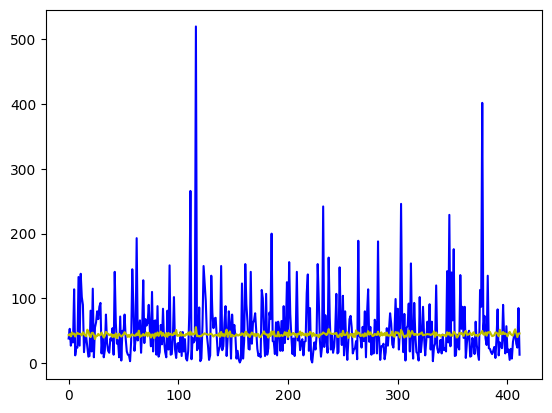

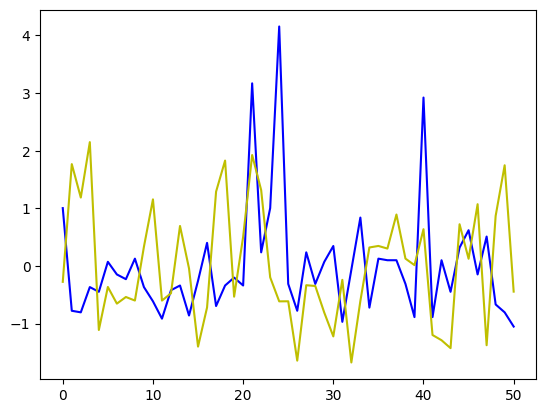

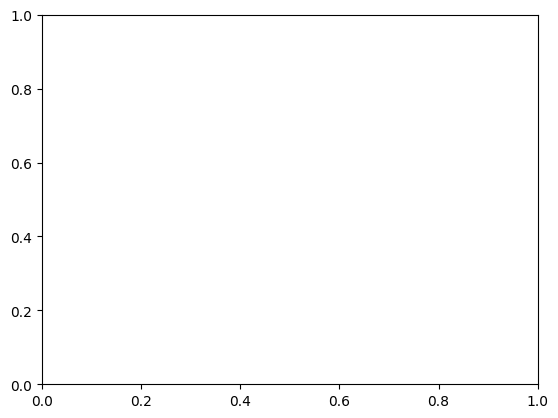

In [209]:
total = len(train_data_pred)
for i in range(total):
    print('Window Size:', i + 12)
    plt.plot(train_data_actual[i],c='b')
    plt.plot(train_data_pred[i], c='y')

    plt.show()
    plt.cla()
    
    plt.plot(normalize(cv_data_actual[i]), c='b')
    plt.plot(normalize(cv_data_pred[i]), c='y')

    plt.show()
    plt.cla()

In [199]:
model.summary()

Model: "RegressionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 1, 34)            136       
 hNormalization)                                                 
                                                                 
 dense_1314 (Dense)          (None, 1, 64)             2240      
                                                                 
 dense_1315 (Dense)          (None, 1, 128)            8320      
                                                                 
 dense_1316 (Dense)          (None, 1, 128)            16512     
                                                                 
 dense_1317 (Dense)          (None, 1, 128)            16512     
                                                                 
 dense_1318 (Dense)          (None, 1, 64)             8256      
                                                   

In [187]:
np.any(df.iloc[7,1:].to_numpy() == 0)

False

# Time Series Dataset

In [6]:
df = pd.read_csv('Data/Electric_Production.xls')
df.columns = ['Date', 'Prod']

In [7]:
df

,Date,Prod
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


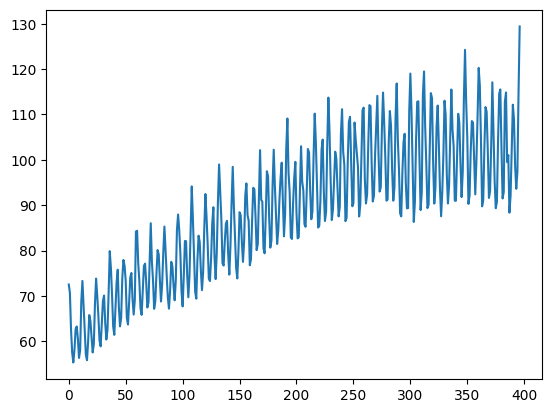

In [8]:
plt.plot(df['Prod'].to_numpy())

In [193]:
def get_regression_model(window_size):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1, window_size)),
#         tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Dense(units=64, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=64, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=1, activation='relu', kernel_initializer='he_normal')
    ], name='RegressionModel')
    return model

def prepare_data(data: np.ndarray, window_size: int, split=(0.8, 0.1, 0.1)):
    assert sum(split) == 1, 'Total Split must cover 100% of input data'
    samples = []
    labels = []
    for i in range(data.shape[0] - window_size):
        samples.append(data[i:i+window_size])
        labels.append(data[i+window_size])
        
    samples = np.array(samples).astype('float32')
    labels = np.array(labels).astype('float32')
    
#     permutations = np.random.permutation(range(samples.shape[0]))
#     samples = samples[permutations]
#     labels = labels[permutations]
    
    num_train = int(split[0] * samples.shape[0])
    num_cv = int(split[1] * samples.shape[0])
    num_test = int(split[2] * samples.shape[0])
    
    train_set = samples[:num_train].reshape((num_train, 1, window_size))
    train_labels = labels[:num_train].reshape((num_train,))
    cv_set = samples[num_train:num_train+num_cv].reshape((num_cv, 1, window_size))
    cv_labels = labels[num_train:num_train+num_cv].reshape((num_cv,))
    test_set = samples[num_train+num_cv:].reshape((samples.shape[0] - num_train - num_cv, 1, window_size))
    test_labels = labels[num_train+num_cv:].reshape((samples.shape[0] - num_train - num_cv,))
    
    return train_set, train_labels, cv_set, cv_labels, test_set, test_labels

normalize = lambda x: (x - x.mean()) / x.std()

In [201]:
window_size = 50
model = get_regression_model(window_size)


In [213]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0000001))

In [202]:
train_set, train_labels, cv_set, cv_labels, test_set, test_labels = prepare_data(df['Prod'].to_numpy(), window_size)

In [217]:
history = model.fit(train_set, train_labels, epochs=3, batch_size=32, verbose=False)

9/9 [==============================] - 0s 4ms/step


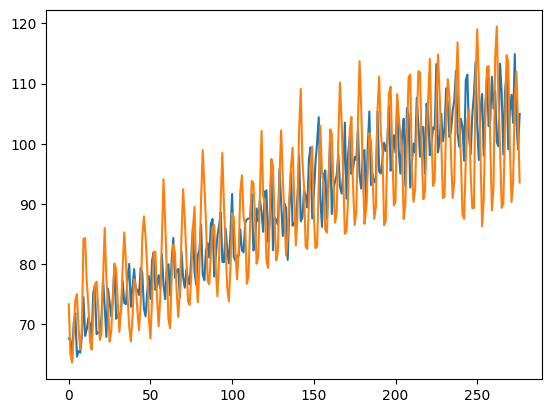

In [219]:
plt.plot(model.predict(train_set).reshape(train_labels.shape))
plt.plot(train_labels)

In [210]:
data = df['Prod'].to_numpy()
samples = []
for i in range(data.shape[0] - window_size):
    samples.append(data[i:i+window_size])
samples = np.array(samples).astype('float32').reshape(len(samples), 1, window_size)

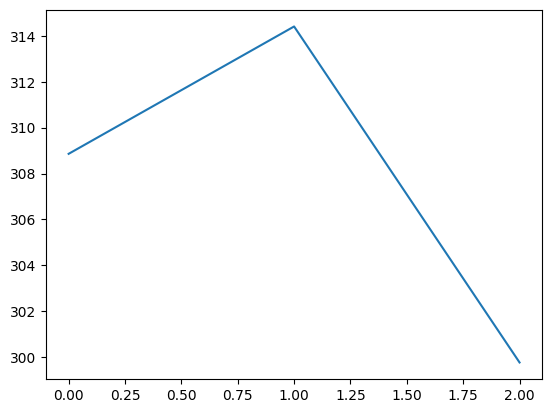

In [218]:
plt.plot(history.history['loss'][:100])

11/11 [==============================] - 0s 4ms/step


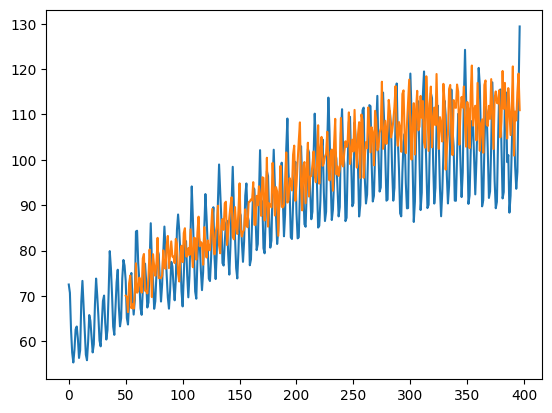

In [212]:
plt.plot(range(len(df['Prod'])), df['Prod'])
plt.plot(range(window_size, len(df['Prod'])), model.predict(samples).ravel())